# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Naufal Zaky Alsar
- **Email:** m010d4ky3264@bangkit.academy
- **ID Dicoding:** M010D4KY3264

## Menentukan Pertanyaan Bisnis

1. Urutan musim yang paling berpengaruh terhadap peminjaman sepeda
2. Urutan cuaca yang paling berpengaruh terhadap peminjaman sepeda
3. Tren peminjaman sepeda
4. Rentang jam yang paling sering digunakan untuk meminjam sepeda
5. Rentang temperature yang paling sering digunakan untuk meminjam sepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Saya akan menggunakan data hour karena terdapat pertanyaan yang menggunakan jam

In [3]:
df = pd.read_csv("hour.csv")

### Assessing Data

Menangani missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika dilihat pada informasi diatas, tidak terdapat missing value sehingga dapat dilanjutkan ke tahapan selanjutnya

Menangani data duplikat

In [6]:
df.duplicated().sum()

0

Jika dilihat pada informasi diatas, tidak terdapat data yang terduplikat sehingga dapat dilanjutkan ke tahapan selanjutnya

Menangani incosistent value

In [7]:
min_values = df.min()
max_values = df.max()

print("Minimum values in each column:")
print(min_values)

print("\nMaximum values in each column:")
print(max_values)

Minimum values in each column:
instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     0
holiday                0
weekday                0
workingday             0
weathersit             1
temp                0.02
atemp                0.0
hum                  0.0
windspeed            0.0
casual                 0
registered             0
cnt                    1
dtype: object

Maximum values in each column:
instant            17379
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
hr                    23
holiday                1
weekday                6
workingday             1
weathersit             4
temp                 1.0
atemp                1.0
hum                  1.0
windspeed         0.8507
casual               367
registered           886
cnt                  977
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika dilihat diatas, data-data sudah konsisten karena berada pada ambas batas yang sesuai dengan metadata dan juga semua tipe data sudah sesuai dengan metadata

Menangani outlier

In [30]:
def count_outliers_iqr_all_columns(df):
    outlier_counts = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]
    return outlier_counts

# Example usage:
outlier_counts = count_outliers_iqr_all_columns(df.drop(['dteday'],axis=1))
print("Number of outliers for each column:")
print(outlier_counts)

Number of outliers for each column:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


Berdasarkan rentang data setiap kolom diatas, dapat dilihat bahwa jikapun terdapat outlier pada kolom2 tersebut, outlier tersebut masih merupakan natural outlier. Sehingga, tidak perlu untuk ditangani.

### Cleaning Data

Berdasarkan assessing data diatas, kita tidak perlu melakukan cleaning data karena tidak terdapat missing data, duplicate data, dan outlier data.

## Exploratory Data Analysis (EDA)

### Pertanyaan 1:

In [51]:
musim_count_df = df.groupby('season')['cnt'].mean().to_frame().reset_index()

print(musim_count_df.sort_values(by="cnt", ascending=False))

   season         cnt
2       3  236.016237
1       2  208.344069
3       4  198.868856
0       1  111.114569


 Kode diatas berguna untuk mengelompokkan berdasarkan season untuk menghitung rata-rata jumlah peminjaman sepeda per-season

### Pertanyaan 2:

In [52]:
cuaca_count_df = df.groupby('weathersit')['cnt'].mean().to_frame().reset_index()

print(cuaca_count_df.sort_values(by="cnt", ascending=False))

   weathersit         cnt
0           1  204.869272
1           2  175.165493
2           3  111.579281
3           4   74.333333


 Kode diatas berguna untuk mengelompokkan berdasarkan cuaca untuk menghitung rata-rata jumlah peminjaman sepeda berdasarkan cuaca

### Pertanyaan 3:

In [66]:
perhari_df = df.groupby('dteday')['cnt'].sum().to_frame().reset_index()

perhari_df['dteday'] = pd.to_datetime(perhari_df['dteday'], format='%Y-%m-%d')

print(perhari_df)

        dteday   cnt
0   2011-01-01   985
1   2011-01-02   801
2   2011-01-03  1349
3   2011-01-04  1562
4   2011-01-05  1600
..         ...   ...
726 2012-12-27  2114
727 2012-12-28  3095
728 2012-12-29  1341
729 2012-12-30  1796
730 2012-12-31  2729

[731 rows x 2 columns]


Kode diatas berguna untuk mengelompokkan jumlah peminjaman sepeda perhari

### Pertanyaan 4:

In [57]:
jam_count_df = df.groupby('hr')['cnt'].mean().to_frame().reset_index()

print(jam_count_df)

    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


 Kode diatas berguna untuk mengelompokkan berdasarkan jam untuk menghitung rata-rata jumlah peminjaman sepeda perjam

### Pertanyaan 5:

In [58]:
atemp_count_df = df.groupby('atemp')['cnt'].mean().to_frame().reset_index()

print(atemp_count_df)

     atemp         cnt
0   0.0000   19.500000
1   0.0152    3.250000
2   0.0303   13.875000
3   0.0455   32.666667
4   0.0606   49.000000
..     ...         ...
60  0.9091  308.000000
61  0.9242  256.200000
62  0.9545  115.000000
63  0.9848  128.000000
64  1.0000  101.000000

[65 rows x 2 columns]


 Kode diatas berguna untuk mengelompokkan berdasarkan atemp untuk menghitung rata-rata jumlah peminjaman sepeda berdasarkan temperatur yang dirasakan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

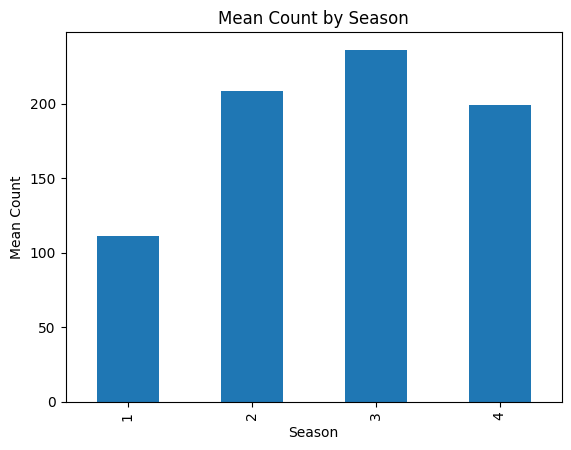

In [62]:
musim_count_df.plot(x='season', y='cnt', kind='bar', legend=False)
plt.xlabel('Season')
plt.ylabel('Mean Count')
plt.title('Mean Count by Season')
plt.show()

Kode diatas berguna untuk menampilkan season dan rata-rata peminjaman sepedanya. Jika dilihat, 3 merupakan season yang paling banyak dalam hal peminjaman sepeda, lalu 2, lalu 4, lalu 1.

### Pertanyaan 2:

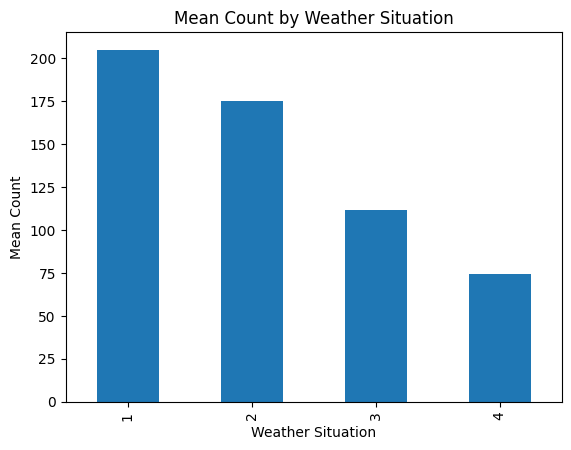

In [63]:
cuaca_count_df.plot(x='weathersit', y='cnt', kind='bar', legend=False)
plt.xlabel('Weather Situation')
plt.ylabel('Mean Count')
plt.title('Mean Count by Weather Situation')
plt.show()

Kode diatas berguna untuk menampilkan situasi cuaca dengan rata-rata peminjaman sepedanya. Jika dilihat, weather situation paling banyak dirental sepedanya adalah weather situation 1 lalu 2 lalu 3 lalu 4.

### Pertanyaan 3:

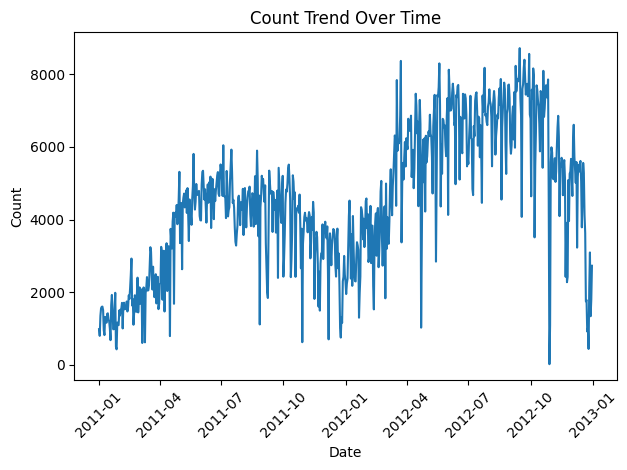

In [68]:
plt.plot(perhari_df['dteday'], perhari_df['cnt'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count Trend Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kode diatas berguna untuk menampilkan line graph dari rental sepeda

### Pertanyaan 4:

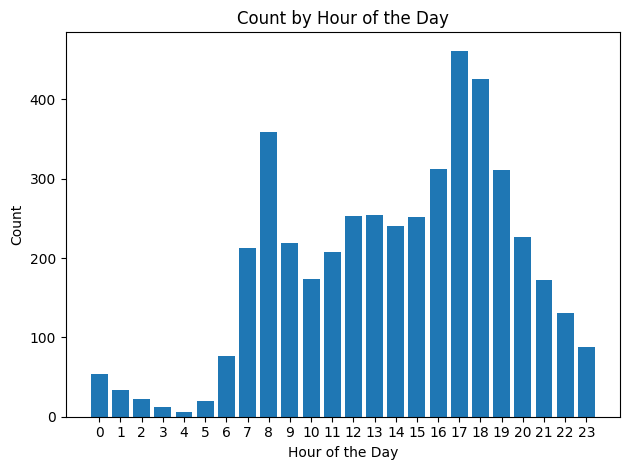

In [69]:
plt.bar(jam_count_df['hr'], jam_count_df['cnt'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Count by Hour of the Day')
plt.xticks(jam_count_df['hr'])
plt.tight_layout()
plt.show()

Kode diatas berguna untuk menampilkan jam dan rata-rata peminjaman sepeda berdasarkan jamnya. Jika dilihat, jam 8 pagi, jam 5 sore memiliki peminjaman sepeda yang tinggi.

### Pertanyaan 5:

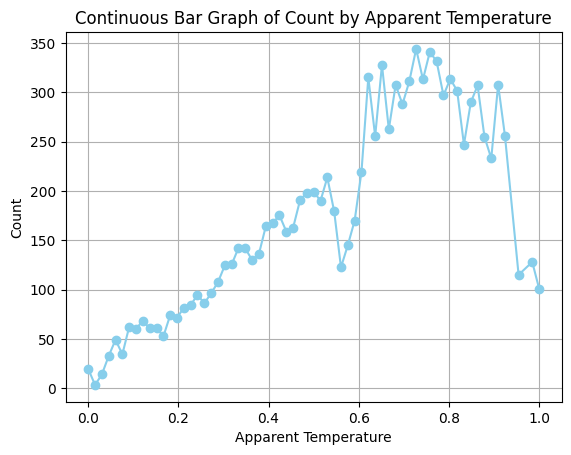

In [71]:
plt.plot(atemp_count_df['atemp'], atemp_count_df['cnt'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Apparent Temperature')
plt.ylabel('Count')
plt.title('Continuous Bar Graph of Count by Apparent Temperature')
plt.grid(True)
plt.show()

Kode diatas berguna untuk menampilkan data rata-rata peminjaman sepeda berdasarkan temperatur yang dirasakan. Jika dilihat, rentang 0.6 sampai 0.85 untuk temperatur merupakan rentang yang paling banyak dirental sepeda.

## Conclusion

### Kesimpulan pertanyaan 1

Berdasarkan gambar sebelumnya, 3 merupakan season yang paling banyak dalam hal perentalan sepeda, lalu 2, lalu 4, lalu 1.

3 Merupakan season yang paling banyak dirental sepedanya. Dimana season ini merupakan season fall.

2 Merupakan season kedua paling banyak dirental sepedanya. Dimana season ini merupakan season summer.

4 merupakan season ketiga paling banyak dirental sepedanya. Dimana season ini merupakan season winter.

1 merupakan season yang paling sedikit dirental sepedanya. Dimana season ini merupakan season spring.

Menurut saya, seharusnya winter dan summer merupakan season yang memiliki sepeda yang dirental sedikit karena temperatur yang ekstrim tetapi berdasarkan data ini, sepertinya dugaan saya dibantah. Untuk alasannya mungkin saja season-season tersebut memiliki daya tarik tersendiri untuk bersepeda atau pada season-season tersebut memiliki hari kerja yang lebih banyak.

### Kesimpulan pertanyaan 2

Berdasarkan gambar sebelumnya, weather situation paling banyak dirental sepedanya adalah weather situation 1 lalu 2 lalu 3 lalu 4.

Hal ini sudah sesuai dengan dugaan saya karena weather situation 1 merupakan cuaca yang paling mendukung untuk bersepeda karena tidak hujan sama sekali sedangkan weather situation 4 merupakan cuaca yang paling tidak mendukung untuk bersepeda karena cuacanya sedang hujan deras, salju, hujan es, dan badai.

### Kesimpulan pertanyaan 3

  Jika dilihat pada gambar sebelumnya, terdapat hari dimana perentalan sepeda sangat sedikit. Dan juga bulan 4 sampai 10 merupakan bulan yang paling sering dirental sepeda. Tahun 2012 memiliki rental sepeda yang lebih banyak daripada rental 2011.

### Kesimpulan pertanyaan 4

Jika dilihat pada gambar sebelumnya, terdapat dua "gunung" yaitu pada sekitar jam 8 pagi dan sekitar jam 5 sore. Hal ini dapat terjadi karena pada waktu tersebut merupakan waktu masuk kerja dan waktu pulang kerja.

### Kesimpulan pertanyaan 5

Jika dilihat pada gambar sebelumnya, rentang 0.6 sampai 0.85 merupakan rentang yang paling banyak digunakan untuk bersepda berdasarkan temperatur yang dirasakan. Hal ini dapat dijelaskan karena temperatur tersebut merupakan temperatur yang pas dimana temperatur tersebut tidak terlalu tinggi dan tidak terlalu rendah.

### Export data

In [73]:
df.to_csv("all_data.csv", index=False)